In [1]:
import pandas as pd
import warnings
import io
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np

from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler
from sklearn.utils import column_or_1d
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv('ETH-USD.csv')

print(df.head())
print(df.describe())
print(df.isnull().sum())

         Date        Open        High         Low       Close   Adj Close  \
0  2019-03-01  136.836243  138.995270  136.434784  136.443619  136.443619   
1  2019-03-02  136.350082  137.184799  132.436386  134.206955  134.206955   
2  2019-03-03  134.786118  135.849289  131.328857  132.249420  132.249420   
3  2019-03-04  132.157883  132.729141  125.402702  127.774124  127.774124   
4  2019-03-05  127.792953  138.229980  126.735298  137.822388  137.822388   

       Volume  
0  3756124824  
1  3747176425  
2  3454374053  
3  4008171341  
4  4764849990  
              Open         High          Low        Close    Adj Close  \
count  1920.000000  1920.000000  1920.000000  1920.000000  1920.000000   
mean   1579.309673  1622.886767  1532.220441  1581.028056  1581.028056   
std    1205.523074  1239.985737  1166.808421  1205.741249  1205.741249   
min     110.406784   116.021622    95.184303   110.605873   110.605873   
25%     269.376304   276.398812   263.429558   269.458023   269.458023 

In [2]:
# Check the columns to ensure 'Date' is present
print(df.columns)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Check for missing values
print(df.isnull().sum())

# Display the first few rows of the dataframe to confirm changes
print(df.head())

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-03-01  136.836243  138.995270  136.434784  136.443619  136.443619   
2019-03-02  136.350082  137.184799  132.436386  134.206955  134.206955   
2019-03-03  134.786118  135.849289  131.328857  132.249420  132.249420   
2019-03-04  132.157883  132.729141  125.402702  127.774124  127.774124   
2019-03-05  127.792953  138.229980  126.735298  137.822388  137.822388   

                Volume  
Date                    
2019-03-01  3756124824  
2019-03-02  3747176425  
2019-03-03  3454374053  
2019-03-04  4008171341  
2019-03-05  4764849990  


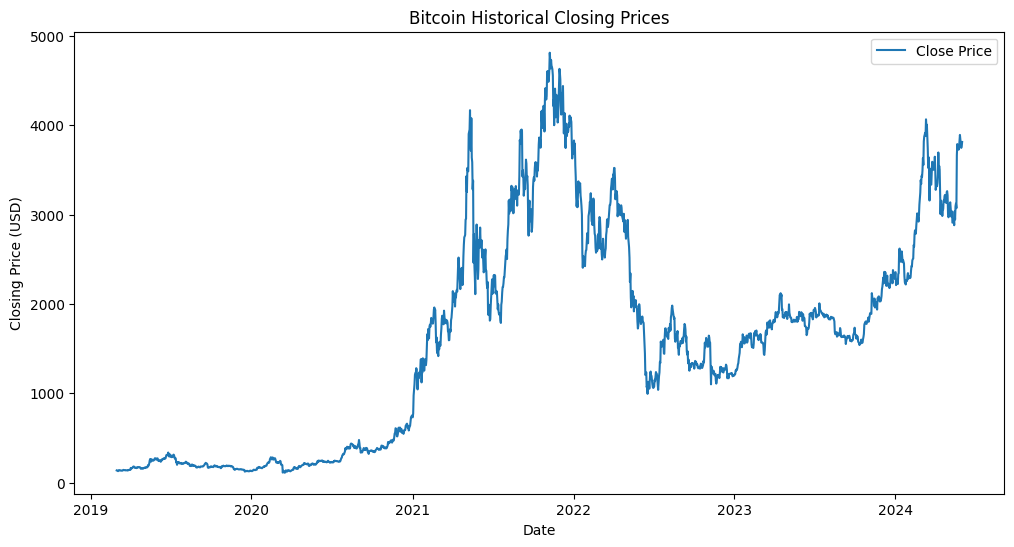

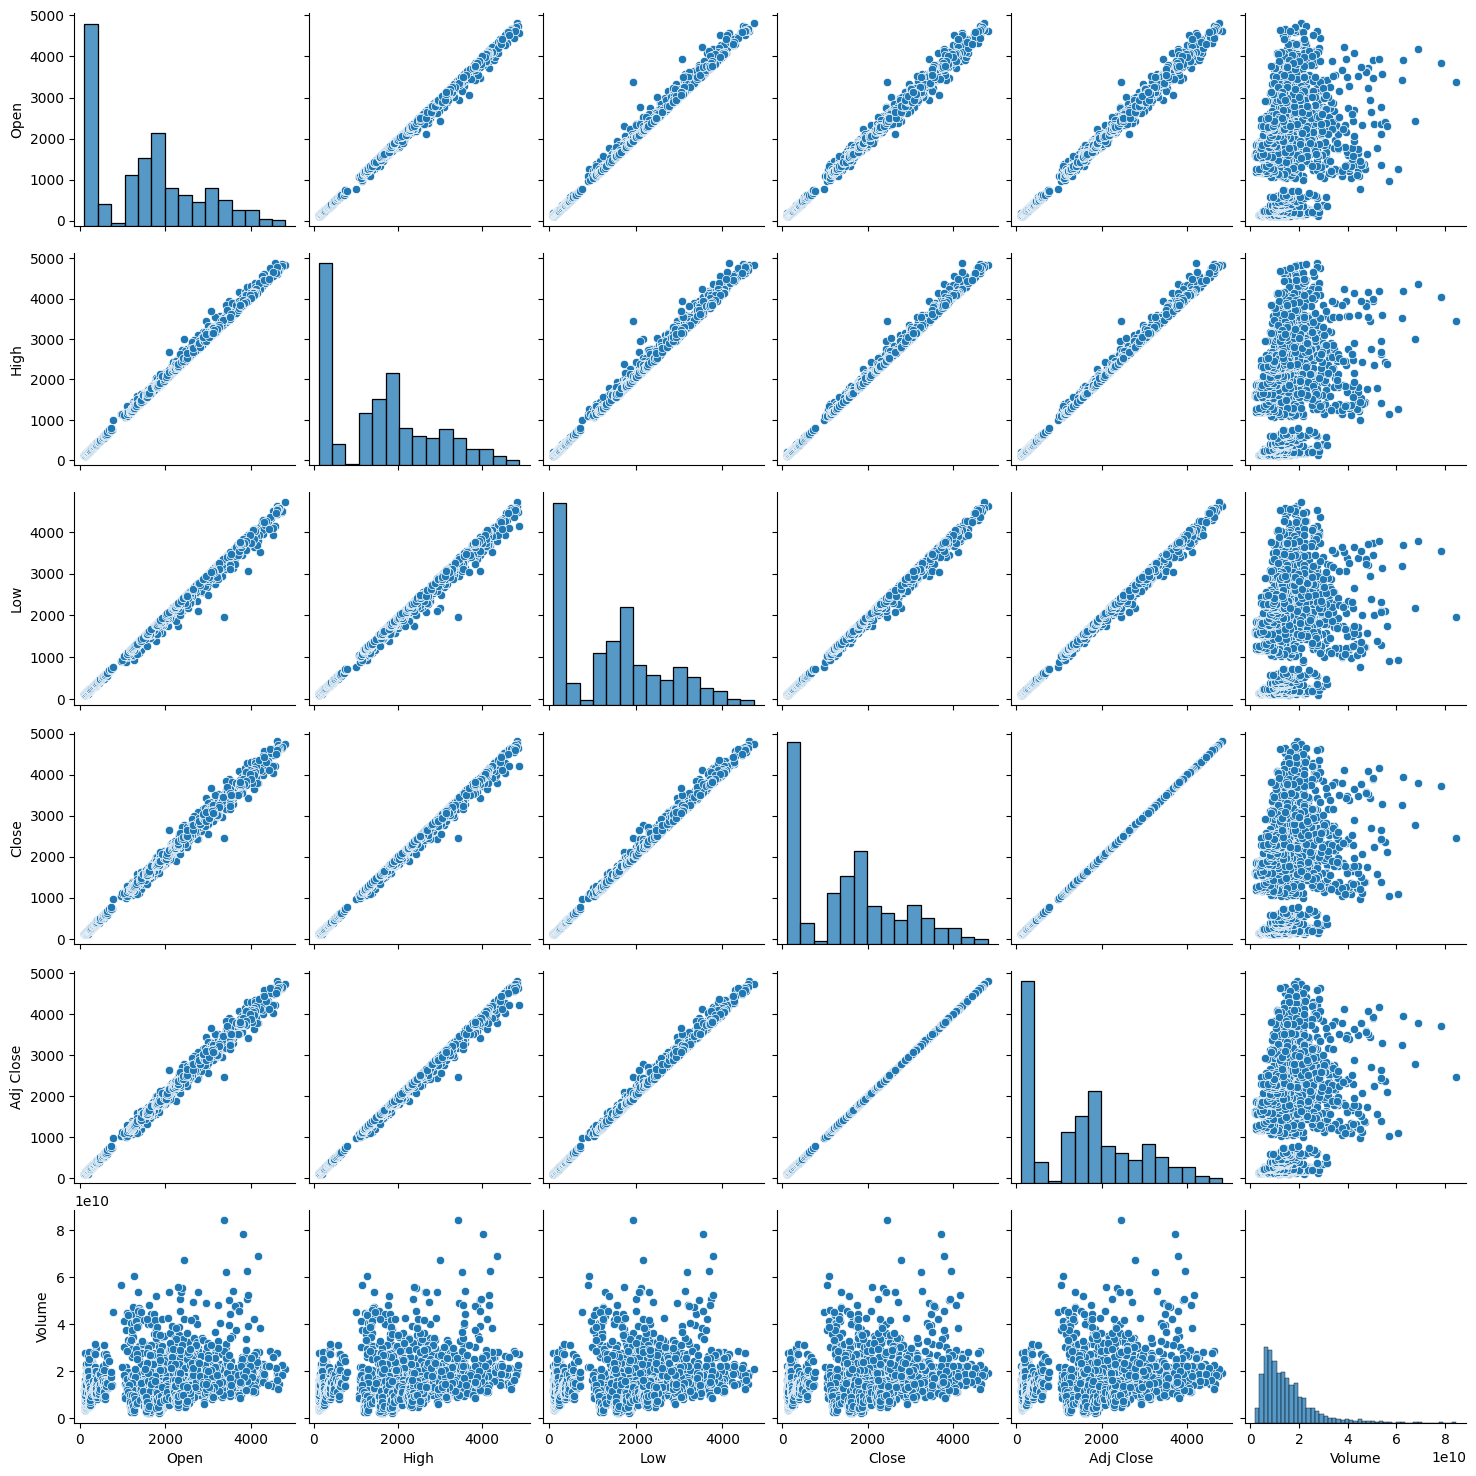

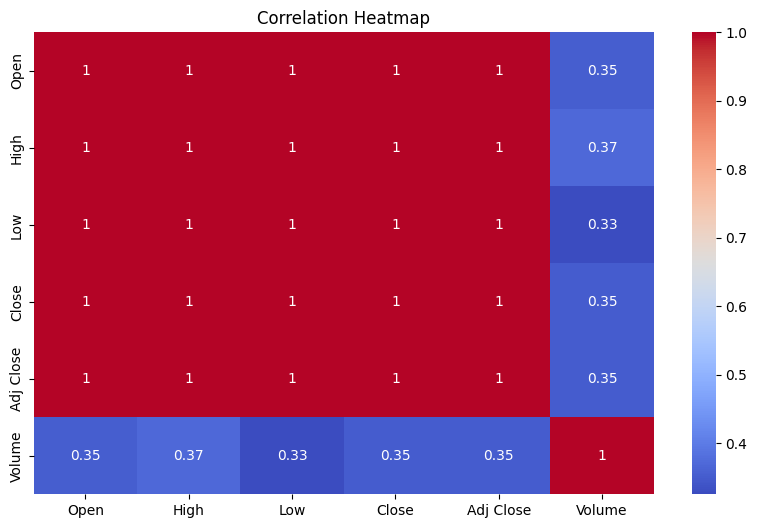

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the historical closing prices of Bitcoin
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.title('Bitcoin Historical Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

# Pair plot to explore relationships
sns.pairplot(df)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

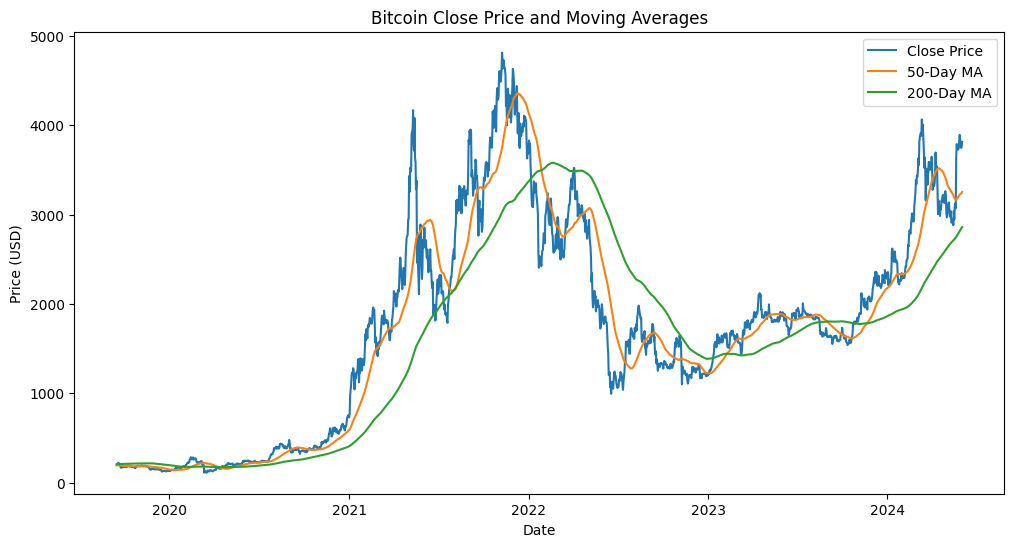

In [4]:
# Calculate daily returns
df['Daily Return'] = df['Close'].pct_change()

# Calculate moving averages
df['50-Day MA'] = df['Close'].rolling(window=50).mean()
df['200-Day MA'] = df['Close'].rolling(window=200).mean()

# Drop NaN values created by rolling windows
df.dropna(inplace=True)

# Visualize the new features
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['50-Day MA'], label='50-Day MA')
plt.plot(df['200-Day MA'], label='200-Day MA')
plt.title('Bitcoin Close Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

Mean Squared Error: 1301.39151493665
R^2 Score: 0.9991077275867322


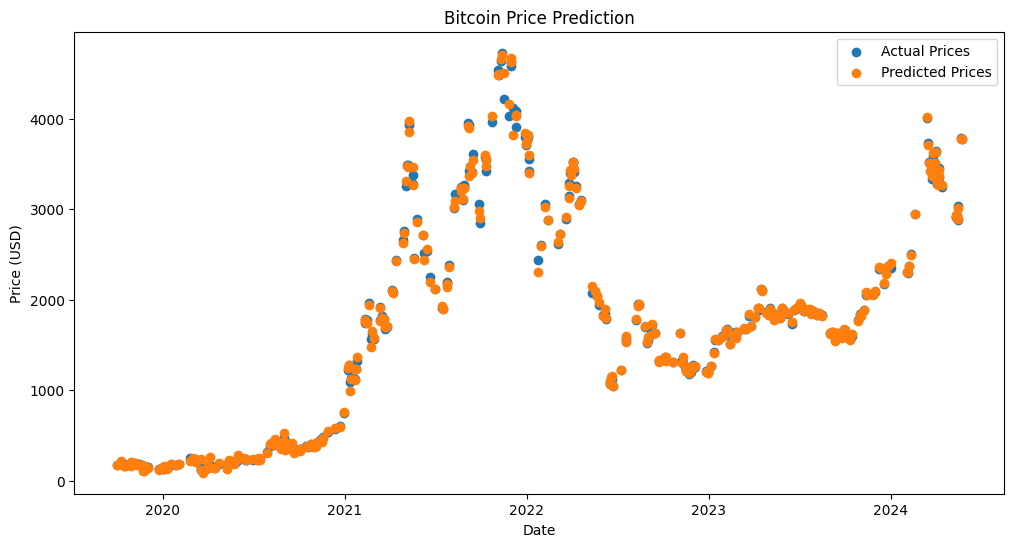

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Prepare the feature set and target variable
X = df[['Open', 'High', 'Low', 'Volume', 'Daily Return', '50-Day MA', '200-Day MA']]
y = df['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plot predictions vs actual values
plt.figure(figsize=(12, 6))
plt.scatter(y_test.index, y_test, label='Actual Prices')
plt.scatter(y_test.index, y_pred, label='Predicted Prices')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

models comparisons 7-2 split


In [6]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:3
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]


In [7]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [8]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)



In [9]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[4077.55719918 4079.81124807 4082.06529696 4084.31934585 4086.57339474
 4088.82744364 4091.08149253 4093.33554142 4095.58959031 4097.8436392
 4100.09768809 4102.35173698 4104.60578587 4106.85983476 4109.11388365
 4111.36793254 4113.62198144 4115.87603033 4118.13007922 4120.38412811
 4122.638177   4124.89222589 4127.14627478 4129.40032367 4131.65437256
 4133.90842145 4136.16247034 4138.41651924 4140.67056813 4142.92461702]


In [10]:
# 7. Đánh giá độ chính xác test
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)


Testing RMSE: 1393.0616895170751


Testing RMSE: 1393.0616895170751


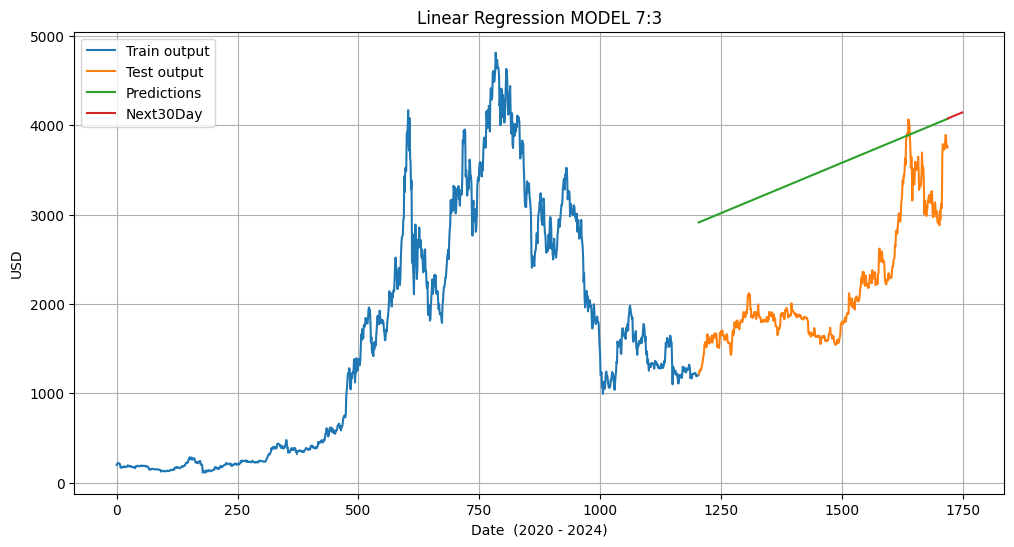

In [11]:
# 8. Tính RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# 9.Vẽ hình
plt.figure(figsize=(12, 6))
plt.grid(True)
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train output', 'Test output', 'Predictions','Next30Day'])
plt.title('Linear Regression MODEL 7:3')
plt.xlabel('Date  (2020 - 2024)')
plt.ylabel('USD')
plt.show()

In [12]:
mae = mean_absolute_error(test_data, y_pred)
mape = mean_absolute_percentage_error(test_data, y_pred)
mse = mean_squared_error(test_data, y_pred)
rmse = np.sqrt(mse)
print('-TEST-')
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

-TEST-
MAE: 1324.29
MAPE: 70.27%
MSE: 1940620.87
RMSE: 1393.06


90 days

Predicted closing prices for the next 90 days:
[4077.55719918 4079.81124807 4082.06529696 4084.31934585 4086.57339474
 4088.82744364 4091.08149253 4093.33554142 4095.58959031 4097.8436392
 4100.09768809 4102.35173698 4104.60578587 4106.85983476 4109.11388365
 4111.36793254 4113.62198144 4115.87603033 4118.13007922 4120.38412811
 4122.638177   4124.89222589 4127.14627478 4129.40032367 4131.65437256
 4133.90842145 4136.16247034 4138.41651924 4140.67056813 4142.92461702
 4145.17866591 4147.4327148  4149.68676369 4151.94081258 4154.19486147
 4156.44891036 4158.70295925 4160.95700814 4163.21105704 4165.46510593
 4167.71915482 4169.97320371 4172.2272526  4174.48130149 4176.73535038
 4178.98939927 4181.24344816 4183.49749705 4185.75154595 4188.00559484
 4190.25964373 4192.51369262 4194.76774151 4197.0217904  4199.27583929
 4201.52988818 4203.78393707 4206.03798596 4208.29203485 4210.54608375
 4212.80013264 4215.05418153 4217.30823042 4219.56227931 4221.8163282
 4224.07037709 4226.32442598 422

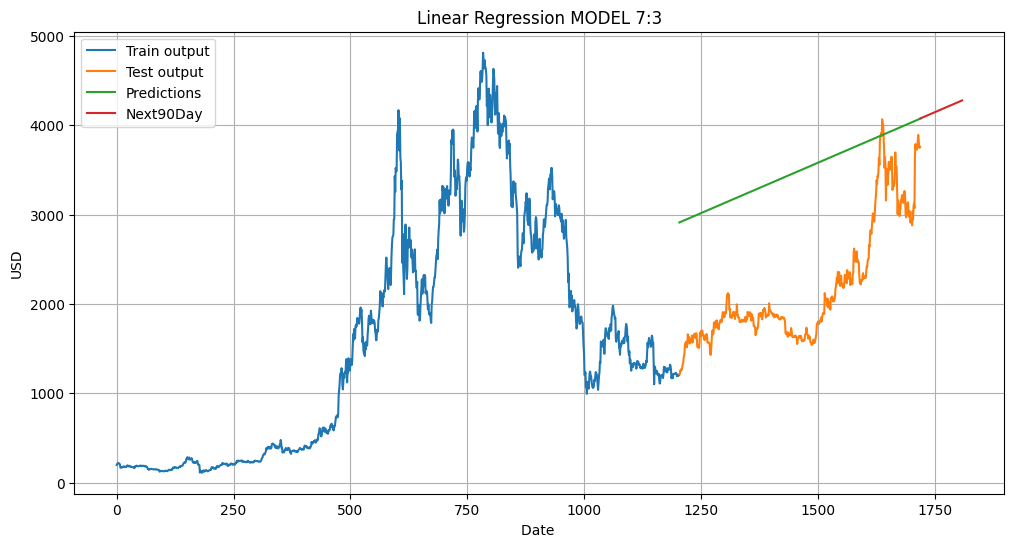

In [13]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:3
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

# 6. Quá trình tạo index predict 90 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = model.predict(x_next_90_days)

# Print the predicted closing prices for the next 90 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.figure(figsize=(12, 6))
plt.grid(True)
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_90_days)
plt.legend(['Train output', 'Test output', 'Predictions','Next90Day'])
plt.title('Linear Regression MODEL 7:3')
plt.xlabel('Date ')
plt.ylabel('USD')
plt.show()

based models comparasion 6:4


Predicted closing prices for the next 30 days:
[6079.9744089  6083.71115844 6087.44790798 6091.18465752 6094.92140706
 6098.6581566  6102.39490614 6106.13165568 6109.86840522 6113.60515476
 6117.3419043  6121.07865384 6124.81540338 6128.55215292 6132.28890246
 6136.025652   6139.76240154 6143.49915108 6147.23590062 6150.97265016
 6154.7093997  6158.44614924 6162.18289878 6165.91964832 6169.65639786
 6173.3931474  6177.12989694 6180.86664648 6184.60339602 6188.34014556]
Validation RMSE: 2263.038684364404
Testing RMSE: 2839.7899927089156
Validation RMSE: 2263.038684364404
Testing RMSE: 2839.7899927089156


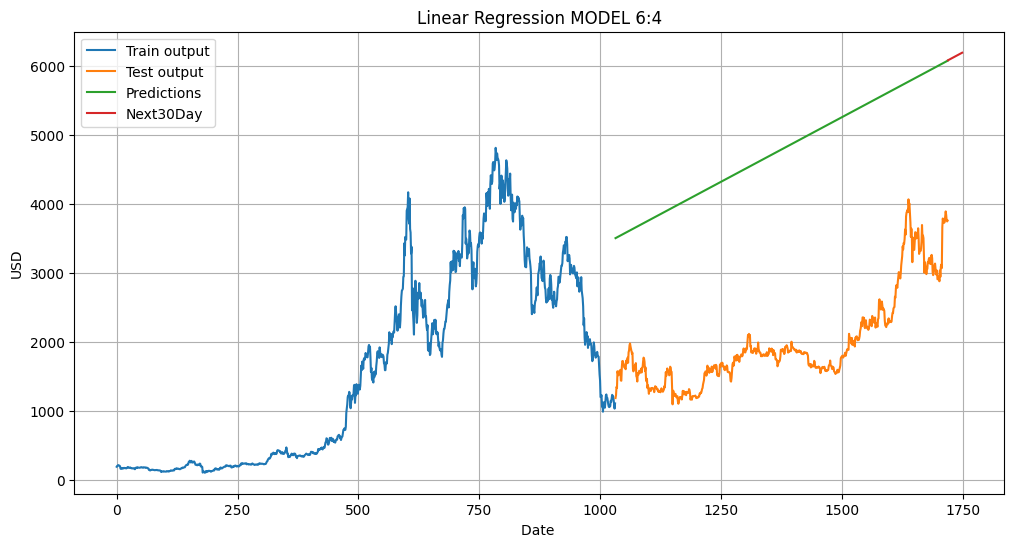

In [14]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 6:4
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.4 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.figure(figsize=(12, 6))
plt.grid(True)
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train output', 'Test output', 'Predictions','Next30Day'])
plt.title('Linear Regression MODEL 6:4')
plt.xlabel('Date ')
plt.ylabel('USD')
plt.show()

In [15]:
mae = mean_absolute_error(test_data, y_pred)
mape = mean_absolute_percentage_error(test_data, y_pred)
mse = mean_squared_error(test_data, y_pred)
rmse = np.sqrt(mse)
print('-TEST-')
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

-TEST-
MAE: 2804.69
MAPE: 154.98%
MSE: 8064407.20
RMSE: 2839.79


Predicted closing prices for the next 90 days:
[6079.9744089  6083.71115844 6087.44790798 6091.18465752 6094.92140706
 6098.6581566  6102.39490614 6106.13165568 6109.86840522 6113.60515476
 6117.3419043  6121.07865384 6124.81540338 6128.55215292 6132.28890246
 6136.025652   6139.76240154 6143.49915108 6147.23590062 6150.97265016
 6154.7093997  6158.44614924 6162.18289878 6165.91964832 6169.65639786
 6173.3931474  6177.12989694 6180.86664648 6184.60339602 6188.34014556
 6192.0768951  6195.81364464 6199.55039418 6203.28714372 6207.02389326
 6210.7606428  6214.49739234 6218.23414188 6221.97089142 6225.70764096
 6229.4443905  6233.18114004 6236.91788958 6240.65463912 6244.39138866
 6248.1281382  6251.86488774 6255.60163728 6259.33838682 6263.07513636
 6266.8118859  6270.54863544 6274.28538498 6278.02213452 6281.75888406
 6285.4956336  6289.23238314 6292.96913268 6296.70588222 6300.44263176
 6304.1793813  6307.91613084 6311.65288038 6315.38962992 6319.12637945
 6322.86312899 6326.59987853 6

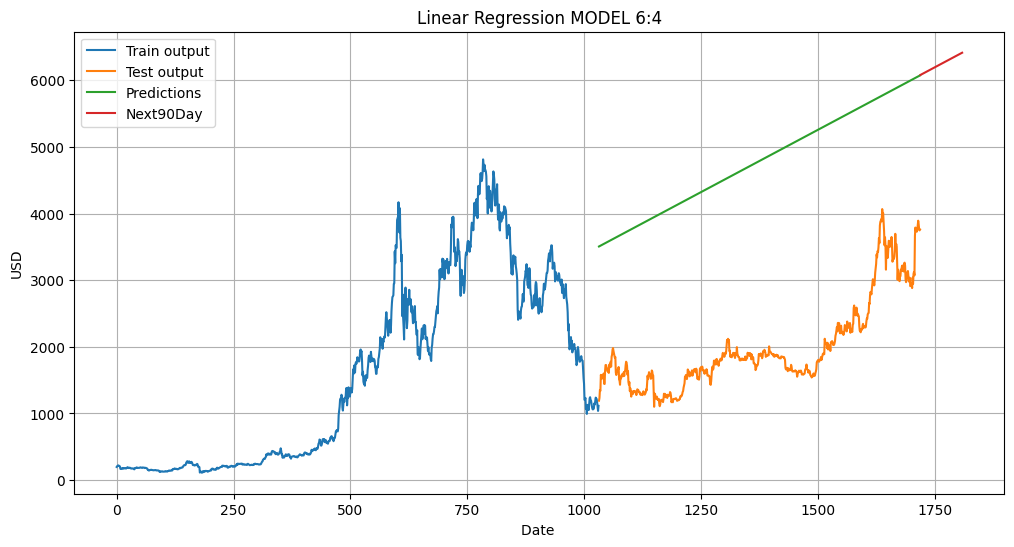

In [16]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 6:4
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.4 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

# 6. Quá trình tạo index predict 90 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = model.predict(x_next_90_days)

# Print the predicted closing prices for the next 90 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.figure(figsize=(12, 6))
plt.grid(True)
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_90_days)
plt.legend(['Train output', 'Test output', 'Predictions','Next90Day'])
plt.title('Linear Regression MODEL 6:4')
plt.xlabel('Date ')
plt.ylabel('USD')
plt.show()

model: 8:2

Predicted closing prices for the next 30 days:
[3223.01983874 3224.61447661 3226.20911448 3227.80375234 3229.39839021
 3230.99302808 3232.58766594 3234.18230381 3235.77694168 3237.37157954
 3238.96621741 3240.56085527 3242.15549314 3243.75013101 3245.34476887
 3246.93940674 3248.53404461 3250.12868247 3251.72332034 3253.31795821
 3254.91259607 3256.50723394 3258.10187181 3259.69650967 3261.29114754
 3262.8857854  3264.48042327 3266.07506114 3267.669699   3269.26433687]
Validation RMSE: 591.7737741216897
Testing RMSE: 797.6787006669757
Validation RMSE: 591.7737741216897
Testing RMSE: 797.6787006669757


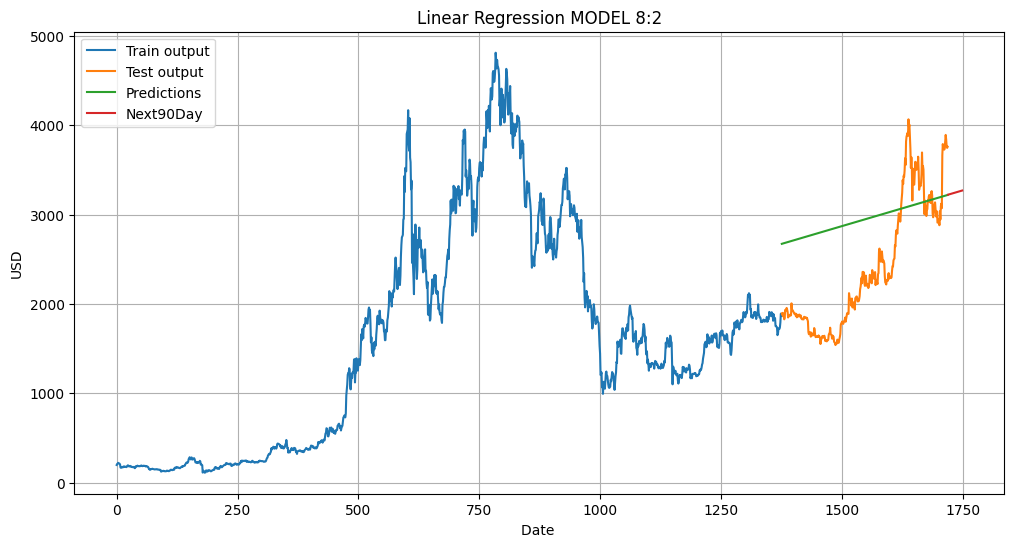

In [17]:
#2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 8:2
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 90 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.figure(figsize=(12, 6))
plt.grid(True)
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train output', 'Test output', 'Predictions','Next90Day'])
plt.title('Linear Regression MODEL 8:2')
plt.xlabel('Date ')
plt.ylabel('USD')
plt.show()

Predicted closing prices for the next 90 days:
[3223.01983874 3224.61447661 3226.20911448 3227.80375234 3229.39839021
 3230.99302808 3232.58766594 3234.18230381 3235.77694168 3237.37157954
 3238.96621741 3240.56085527 3242.15549314 3243.75013101 3245.34476887
 3246.93940674 3248.53404461 3250.12868247 3251.72332034 3253.31795821
 3254.91259607 3256.50723394 3258.10187181 3259.69650967 3261.29114754
 3262.8857854  3264.48042327 3266.07506114 3267.669699   3269.26433687
 3270.85897474 3272.4536126  3274.04825047 3275.64288834 3277.2375262
 3278.83216407 3280.42680193 3282.0214398  3283.61607767 3285.21071553
 3286.8053534  3288.39999127 3289.99462913 3291.589267   3293.18390487
 3294.77854273 3296.3731806  3297.96781846 3299.56245633 3301.1570942
 3302.75173206 3304.34636993 3305.9410078  3307.53564566 3309.13028353
 3310.7249214  3312.31955926 3313.91419713 3315.50883499 3317.10347286
 3318.69811073 3320.29274859 3321.88738646 3323.48202433 3325.07666219
 3326.67130006 3328.26593793 332

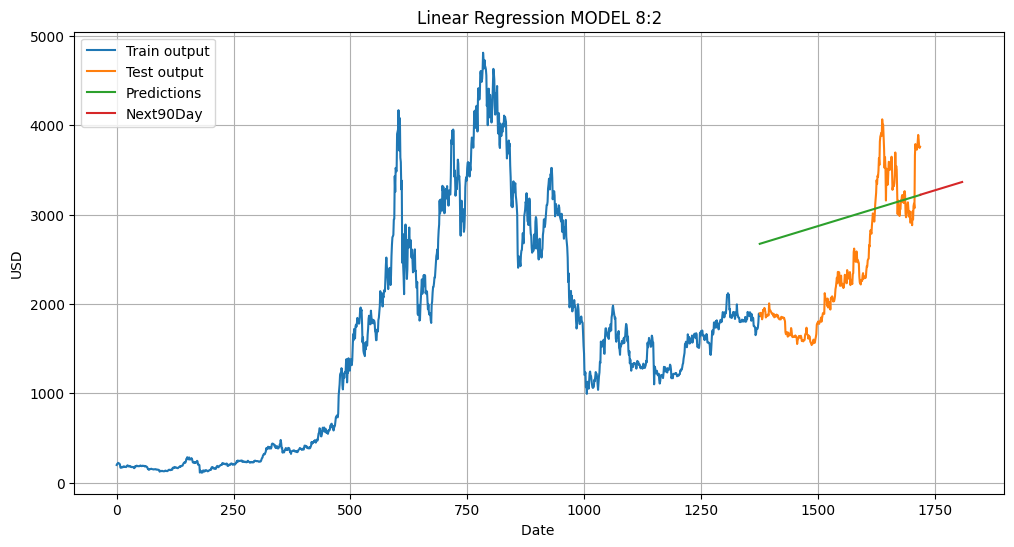

In [18]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 8:2
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

# 6. Quá trình tạo index predict 90 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = model.predict(x_next_90_days)

# Print the predicted closing prices for the next 90 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.figure(figsize=(12, 6))
plt.grid(True)
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_90_days)
plt.legend(['Train output', 'Test output', 'Predictions','Next90Day'])
plt.title('Linear Regression MODEL 8:2')
plt.xlabel('Date ')
plt.ylabel('USD')
plt.show()

In [19]:
mae = mean_absolute_error(test_data, y_pred)
mape = mean_absolute_percentage_error(test_data, y_pred)
mse = mean_squared_error(test_data, y_pred)
rmse = np.sqrt(mse)
print('-TEST-')
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

-TEST-
MAE: 713.73
MAPE: 35.96%
MSE: 636291.31
RMSE: 797.68
